# Stock and Portfolio exploration Tool:

In [1]:
% cd Notebooks/

C:\Users\appweeve\Documents\Code\Quantopian\Project\Notebooks


In [2]:
%run Dataframe_Construction.ipynb

In [3]:
%run Portfolio_methods.ipynb

In [4]:
print(symbol_list)

['AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'WMT', 'HD', 'JPM', 'VZ', 'XOM', 'AAL']


In [5]:
price_dict = load_adj_price_dict()

In [6]:
return_df = get_return_df(construct_adj_close_df(price_dict),symbol_list)
corr_df = return_df.corr()

## Diversification Tools:
- get_diversification_candidates(corr_df, epsilon)
If we trade a portfolio of stocks to be diversified we want stocks with 0 return correlation.
The above method provides a dataframe in which every stock is, in an "epsilon interval" around 0.

- get_neg_corr(corr_df)
If we want to hedge a position we will want negative price correlation in our stocks.
This method returns us a dataframe in which only stocks with negative price correlation are present.

In [7]:
get_diversification_candidates(corr_df,0.02)


,MSFT_return,AAL_return
MSFT_return,NaN,0.015266
AAL_return,0.015266,NaN


In [8]:
get_neg_corr(corr_df)

,TSLA_return,AMZN_return,WMT_return,AAL_return
TSLA_return,NaN,NaN,NaN,-0.038911
AMZN_return,NaN,NaN,NaN,-0.050067
WMT_return,NaN,NaN,NaN,-0.117232
AAL_return,-0.038911,-0.050067,-0.117232,NaN


## Plotting Capabilites:
- plot_heatmap(corr_df) plots a heatmap of a Dataframe this is especially useful for correllation matricies
- plot_return_distributions(symbol_list) plots the Kernel densitiy estimation of the returns which estimates the underlying probability distribution of the returns
- candlestick_chart(symbol) plots a candlestick chart of the given symbol (THIS DOES NOT ADJUST FOR STOCK SPLITS AS SEEN IN THE EXAMPLE!)

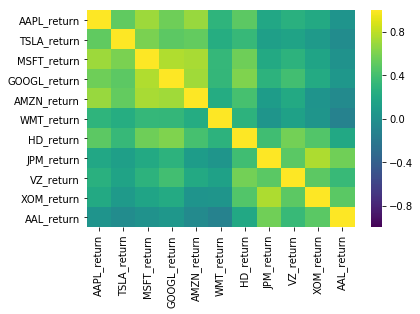

In [9]:
plot_heatmap(corr_df)

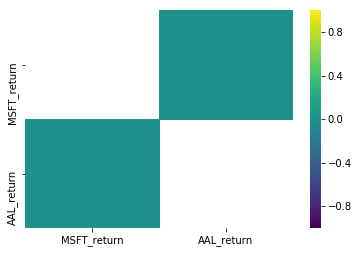

In [10]:
plot_heatmap(get_diversification_candidates(corr_df,0.03))


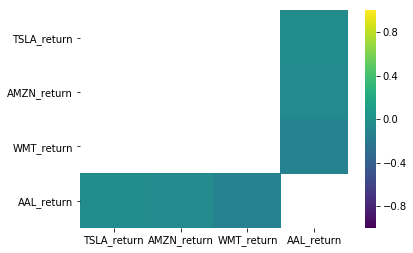

In [11]:
plot_heatmap(get_neg_corr(corr_df))

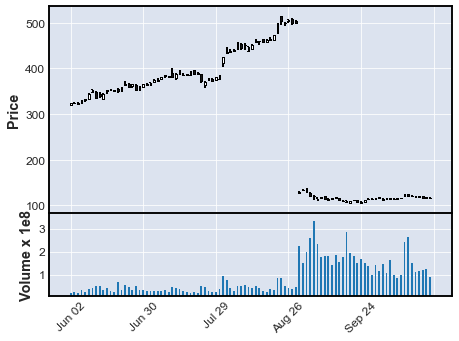

In [12]:
candlestick_chart("AAPL")

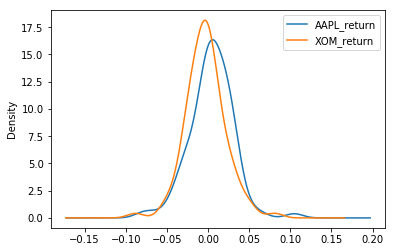

In [13]:
plot_return_distributions(["AAPL","XOM"])

## Portfolio Methods:
Important methods:
- get_portfolio_df(portfolio p, dataframe price_df)
    - This function creates a dataframe that tracks the individual portfolio_performance over the span of our price data.

- summary(dataframe portfolio_df)
    - This function creates a statistical summary of the portfolio performance with important core variables.

- pickle_query_df()
    - This function creates a dataframe of possible portfolio performances so we can query different types of portfolios.(WARNING: this function is poorly optimised and takes a VERY long time to compute!)

- load_query_df()
    - This function loads the pickled query dataframe.

- get_potential_portfolios(float risk_quantile, float reward_quantile)
    - This function returns query results which lie above the x-quantile in the "reward"-columns and which lie above the y-quantile in the "risk"-columns.

- get_low_risk_portfolios(risk_quantile,worst_case_quantile)
    - This function returns query results which lie below the x-quantile in the "risk"-columns and below y in the maxdrawdown column.


Here we see an example Portfolio:
    It buys American Airlines and Wallmart Stock in a 40%-60% split with 100.000$ in capital at time t_0:

In [14]:
t_0 = price_df.index[0]
p = Portfolio(("AAL","WMT"),(0.4,0.6),100000,t_0)

In [15]:
p_df = get_portfolio_df(p,price_df)

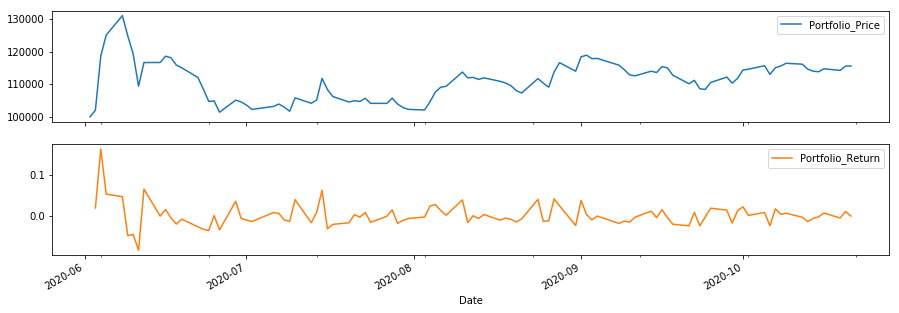

In [16]:
visualize_porfolio_performance(p_df)

This is the summary of holding this Portfolio:
We earned 15% of our initial Investment but we had to suffer quite a lot for it mentally with a drawdown of 16% we had quite the swings downwards and a significant volatility in returns.

In [17]:
summary(p_df)

{'start_investment': 99988.467,
 'end_pos_size': 115614.32500000001,
 'total_return': 0.15627660338066662,
 'std_return': 0.028419413235385063,
 'mean_return': 0.00185445427377504,
 'drawdown': 0.16334033057085517,
 'max_drawdown': 0.2469636995958575,
 'longest_drawdown_period': 4,
 'second_longest_drawdown_period': 3,
 'num_o_longest_drawdown': 11,
 'num_o_sec_longest_drawdown': 3,
 'risk_return_ratio': 0.6327917974844266,
 'signal_to_noise': 0.06525308099838091}

## Querying Possible Candidates:

In [18]:
q_df = load_query_df()

In [19]:
q_df.describe()

,AAPL_Weight,TSLA_Weight,MSFT_Weight,GOOGL_Weight,AMZN_Weight,WMT_Weight,HD_Weight,JPM_Weight,VZ_Weight,XOM_Weight,...,std_return,mean_return,drawdown,max_drawdown,longest_drawdown_period,second_longest_drawdown_period,num_o_longest_drawdown,num_o_sec_longest_drawdown,risk_return_ratio,signal_to_noise
count,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,...,7536.000000,7536.000000,7536.000000,7536.000000,7536.0,7536.0,7536.0,7536.0,7536.000000,7536.000000
mean,0.213349,0.189039,0.163402,0.137699,0.104220,0.075690,0.049894,0.030175,0.016959,0.009859,...,0.025278,0.004012,0.058383,0.153418,2.0,1.0,1.0,2.0,2.819941,0.153263
std,0.194325,0.186304,0.175888,0.162618,0.136467,0.107827,0.082913,0.061865,0.044068,0.033184,...,0.007318,0.001679,0.019770,0.053232,0.0,0.0,0.0,0.0,0.513743,0.025889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011026,0.000551,0.011857,0.056279,2.0,1.0,1.0,2.0,0.505583,0.033101
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019777,0.002729,0.043796,0.112742,2.0,1.0,1.0,2.0,2.477366,0.138413
50%,0.200000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023546,0.003743,0.056277,0.144534,2.0,1.0,1.0,2.0,2.888416,0.158963
75%,0.300000,0.300000,0.300000,0.200000,0.200000,0.100000,0.100000,0.000000,0.000000,0.000000,...,0.029697,0.005084,0.070976,0.187325,2.0,1.0,1.0,2.0,3.228159,0.173804
max,1.000000,1.000000,1.000000,1.000000,0.900000,0.900000,0.900000,0.600000,0.500000,0.600000,...,0.053776,0.010310,0.158003,0.345422,2.0,1.0,1.0,2.0,4.044657,0.192797


In [20]:
pot_df = get_potential_portfolios(0.1,0.25)
pot_df

,AAPL_Weight,TSLA_Weight,MSFT_Weight,GOOGL_Weight,AMZN_Weight,WMT_Weight,HD_Weight,JPM_Weight,VZ_Weight,XOM_Weight,AAL_Weight,std_return,mean_return,drawdown,max_drawdown,risk_return_ratio,signal_to_noise
4398,0.1,0.1,0.0,0.3,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.017304,0.002780,0.028240,0.101325,2.931336,0.160668
4655,0.2,0.1,0.0,0.2,0.0,0.3,0.0,0.0,0.2,0.0,0.0,0.017068,0.002855,0.030333,0.101157,3.036544,0.167285
6357,0.1,0.1,0.0,0.2,0.1,0.3,0.1,0.0,0.1,0.0,0.0,0.017080,0.002815,0.031797,0.099524,3.034918,0.164833


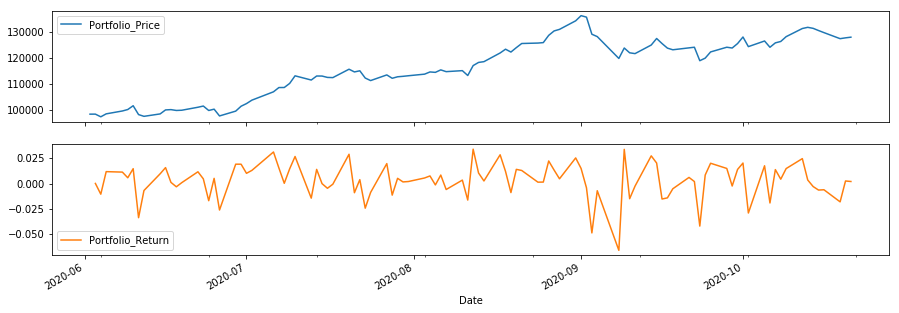

In [21]:
visualize_porfolio_performance(copy_portfolio(pot_df,i=2))

In [22]:
pot_df2 = get_low_risk_portfolios(0.01,0.001)
pot_df2

,AAPL_Weight,TSLA_Weight,MSFT_Weight,GOOGL_Weight,AMZN_Weight,WMT_Weight,HD_Weight,JPM_Weight,VZ_Weight,XOM_Weight,AAL_Weight,std_return,mean_return,drawdown,max_drawdown,risk_return_ratio,signal_to_noise
6349,0.0,0.0,0.2,0.2,0.0,0.3,0.1,0.2,0.0,0.0,0.0,0.012545,0.001248,0.021106,0.058926,2.081453,0.099469
6502,0.0,0.0,0.0,0.5,0.0,0.2,0.0,0.2,0.1,0.0,0.0,0.012750,0.000964,0.015076,0.056279,1.622270,0.075618


here it is interesting to see how these stricter less volatile Portfolios don't dip as deep in the return around September of 2020.

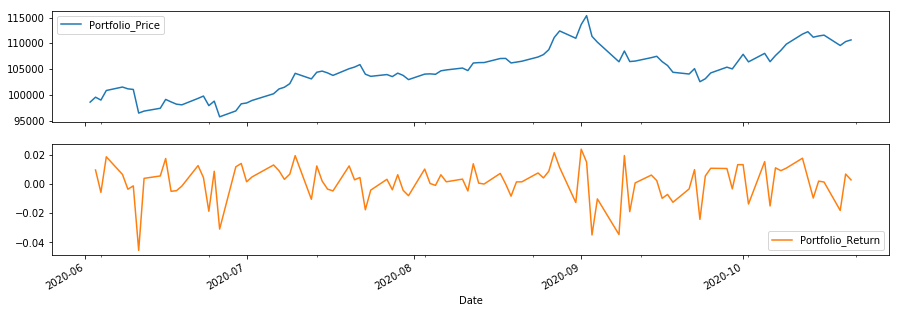

In [23]:
visualize_porfolio_performance(copy_portfolio(pot_df2,i=0))